# Loading important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

# Importing the Bankrupt Dataset

In [2]:
bankrupt = pd.read_excel("bankruptcy-prevention.xlsx")
bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [3]:
bankrupt.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print(bankrupt.info())
print(bankrupt.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB
None
(250, 7)


## checking is there any missing values are there in data or not

In [5]:
bankrupt.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [6]:
bankrupt_new = bankrupt.iloc[:,:]
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [7]:
bankrupt_new["class_yn"] = 1
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,1
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,1
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,1
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,1
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


## Here we are changing  the target variable to bankruptcy = 0, non-bankruptcy = 1

In [8]:
bankrupt_new.loc[bankrupt[' class'] == 'bankruptcy', 'class_yn'] = 0

In [9]:
bankrupt_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy,0
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy,0
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy,0
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy,0
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy,1
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy,1
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy,1
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy,1


In [10]:
bankrupt_new.drop(' class', inplace = True, axis =1)
bankrupt_new.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0


# Exploratory Data Analysis (EDA)


In [11]:
bankrupt_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class_yn
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class_yn,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<Axes: >

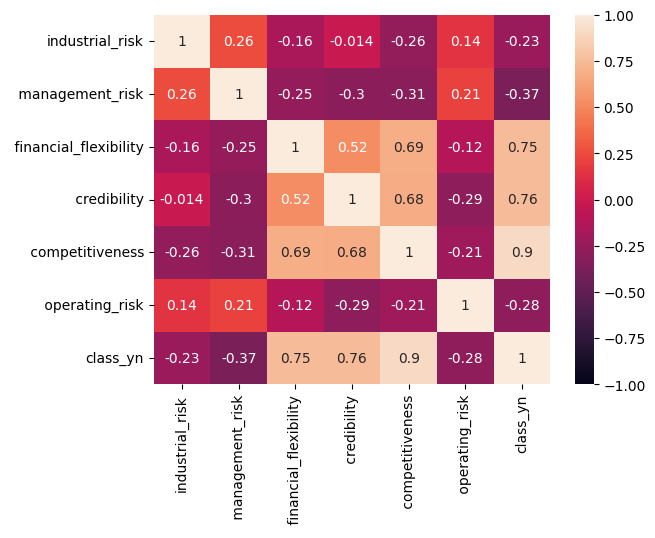

In [12]:
sns.heatmap(bankrupt_new.corr(), vmin = -1, vmax = 1, annot = True)

<Axes: xlabel='class_yn', ylabel='count'>

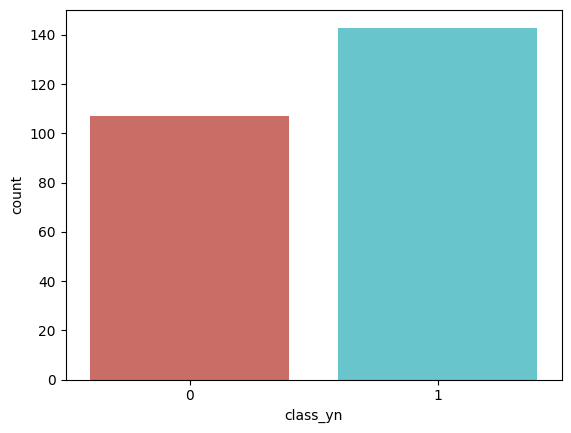

In [13]:
sns.countplot(x = 'class_yn', data = bankrupt_new, palette = 'hls')

<Axes: xlabel=' financial_flexibility', ylabel='count'>

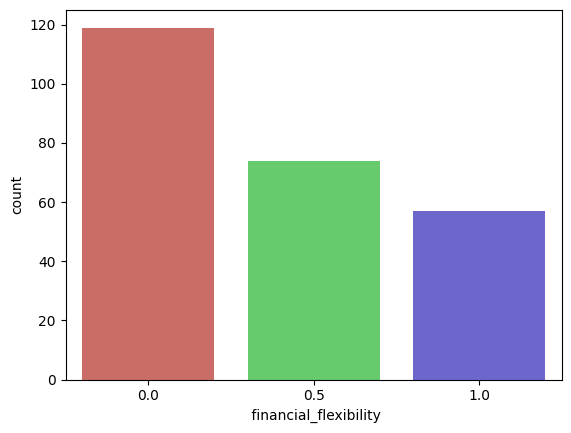

In [14]:
sns.countplot(x = ' financial_flexibility', data = bankrupt_new, palette = 'hls')

<Axes: xlabel='class_yn'>

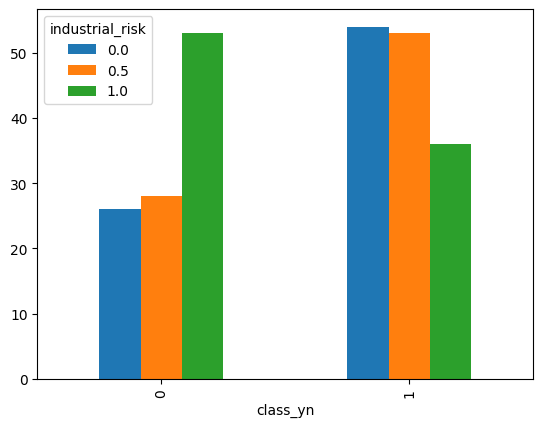

In [15]:
# for visualization

pd.crosstab(bankrupt.class_yn, bankrupt.industrial_risk).plot(kind='bar')

In [16]:
bankrupt_new.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', 'class_yn'],
      dtype='object')

<Axes: xlabel=' financial_flexibility'>

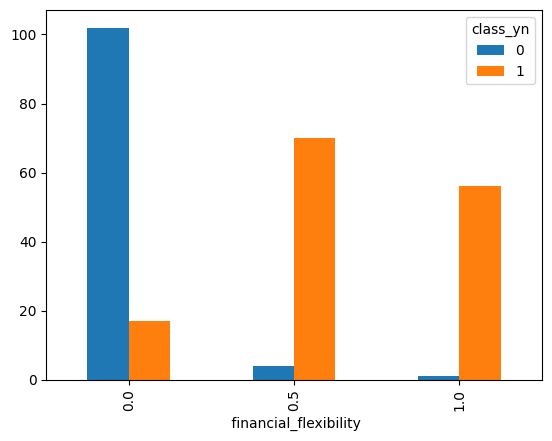

In [17]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new['class_yn']).plot(kind = 'bar')


<Axes: xlabel=' credibility'>

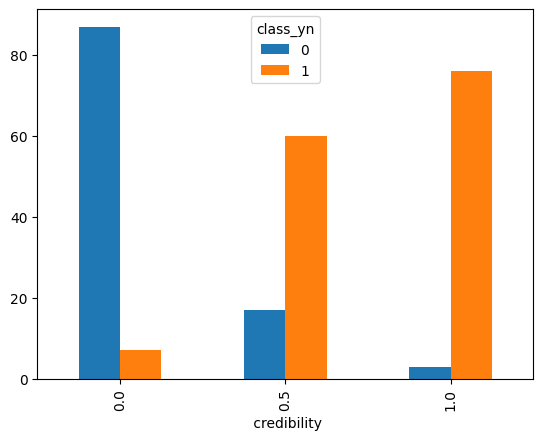

In [18]:
pd.crosstab(bankrupt_new[' credibility'], bankrupt_new.class_yn).plot(kind = 'bar')

<Axes: xlabel=' operating_risk'>

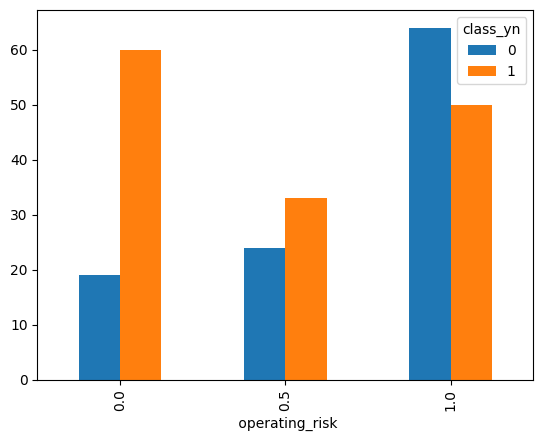

In [19]:
pd.crosstab(bankrupt_new[' operating_risk'], bankrupt_new.class_yn).plot(kind='bar')

<Axes: xlabel=' financial_flexibility'>

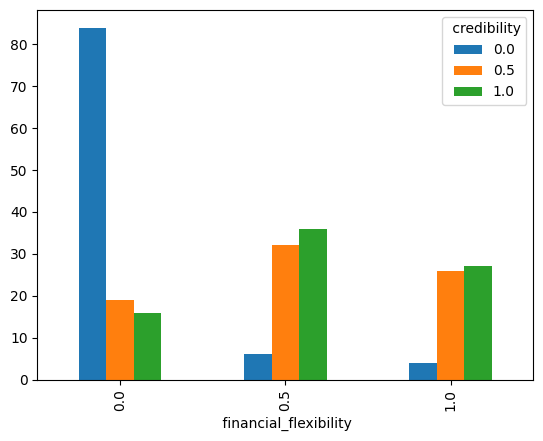

In [20]:
pd.crosstab(bankrupt_new[' financial_flexibility'], bankrupt_new[' credibility']).plot(kind = 'bar')


In [21]:
np.shape(bankrupt_new)

(250, 7)

In [22]:
# Input
x = bankrupt_new.iloc[:,:-1]

# Target variable

y = bankrupt_new.iloc[:,-1]

In [23]:
from sklearn.model_selection import train_test_split # trian and test
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Sliptting the data into train and test


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)

Checking for outliers for each column

In [ ]:
# @title Checking for outliers for each column


{'whiskers': [<matplotlib.lines.Line2D at 0x7db727f94820>,
 'caps': [<matplotlib.lines.Line2D at 0x7db725821270>,
 'boxes': [<matplotlib.lines.Line2D at 0x7db727f97580>],
 'medians': [<matplotlib.lines.Line2D at 0x7db725821960>],
 'fliers': [<matplotlib.lines.Line2D at 0x7db725823490>],
 'means': []}

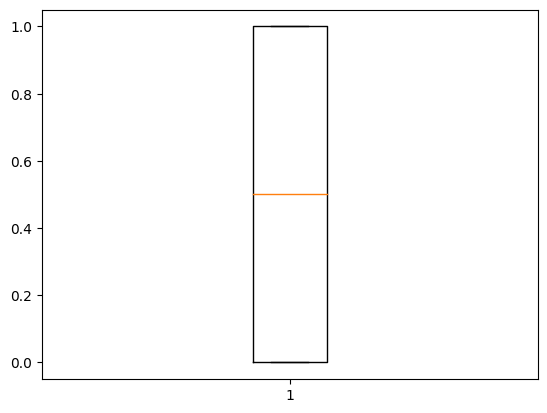

In [166]:
plt.boxplot(bankrupt_new['industrial_risk'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7db71374ffa0>,
 'caps': [<matplotlib.lines.Line2D at 0x7db713578520>,
 'boxes': [<matplotlib.lines.Line2D at 0x7db71374fd00>],
 'medians': [<matplotlib.lines.Line2D at 0x7db713578a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7db713578d00>],
 'means': []}

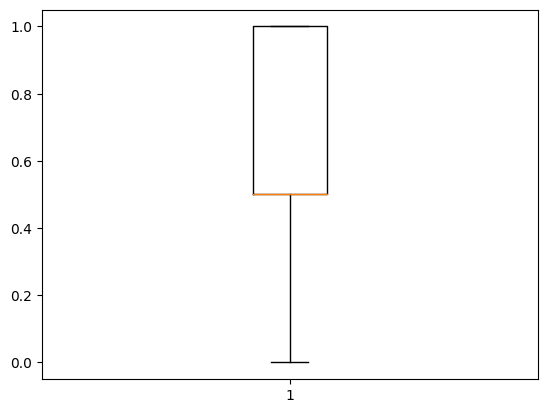

In [167]:
plt.boxplot(bankrupt_new[' management_risk'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7db7135eec80>,
 'caps': [<matplotlib.lines.Line2D at 0x7db7135ef1c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7db7135ee9e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7db7135ef700>],
 'fliers': [<matplotlib.lines.Line2D at 0x7db7135ef9a0>],
 'means': []}

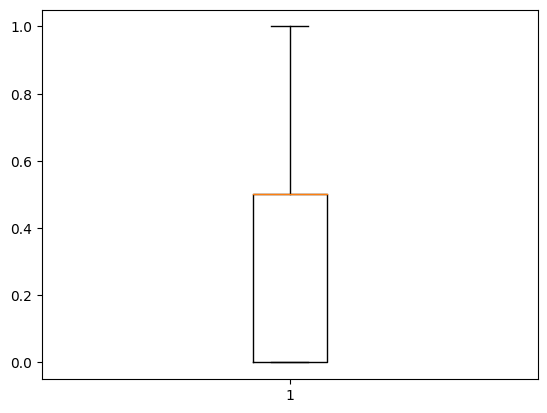

In [168]:
plt.boxplot(bankrupt_new[' financial_flexibility'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7db713641690>,
 'caps': [<matplotlib.lines.Line2D at 0x7db713641bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7db7136413f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7db713642110>],
 'fliers': [<matplotlib.lines.Line2D at 0x7db7136423b0>],
 'means': []}

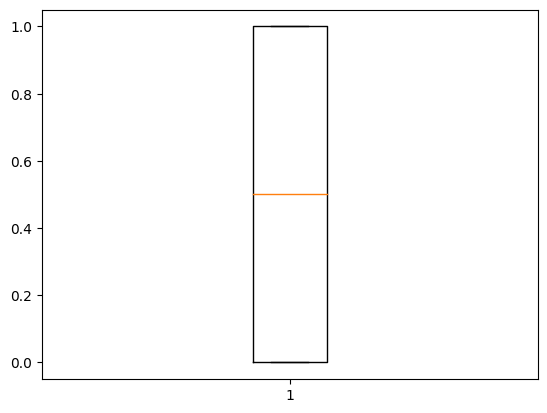

In [169]:
plt.boxplot(bankrupt_new[' credibility'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7db7134e43a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7db7134e48e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7db7134e4100>],
 'medians': [<matplotlib.lines.Line2D at 0x7db7134e4e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x7db7134e50c0>],
 'means': []}

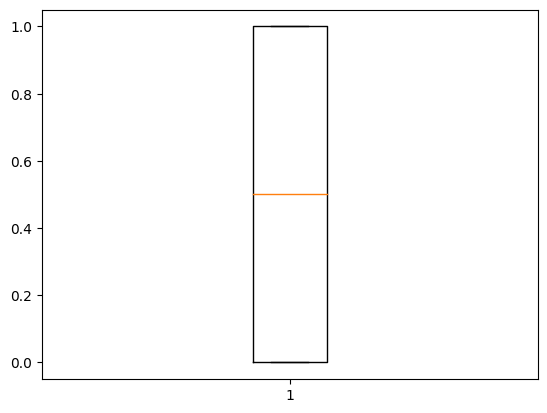

In [170]:
plt.boxplot(bankrupt_new[' competitiveness'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7db713552e00>,
 'caps': [<matplotlib.lines.Line2D at 0x7db713553340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7db713552b60>],
 'medians': [<matplotlib.lines.Line2D at 0x7db713553880>],
 'fliers': [<matplotlib.lines.Line2D at 0x7db713553b20>],
 'means': []}

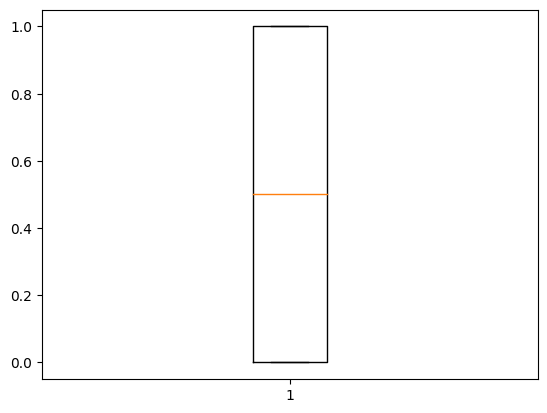

In [171]:
plt.boxplot(bankrupt_new[' operating_risk'].dropna())

In [ ]:
# @title Feature Engineering



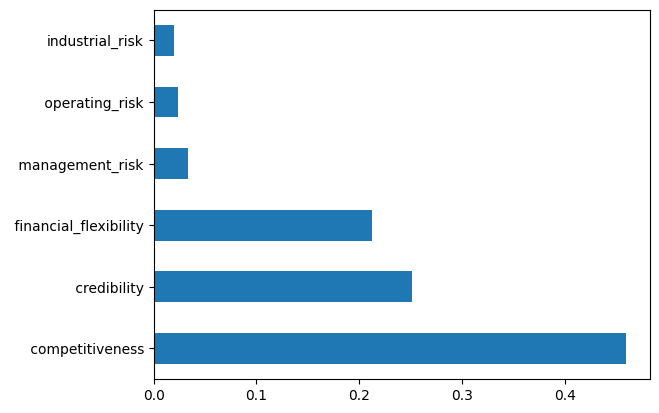

In [172]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit (x,y)
feat_importances = pd. Series (model. feature_importances_, index=x.columns)
feat_importances.nlargest (6).plot(kind='barh')
plt. show()

In [173]:
from sklearn. feature_selection import SelectKBest
from sklearn. feature_selection import chi2
bestfeatures = SelectKBest (score_func=chi2, k=6)
fit = bestfeatures.fit (x,y)
datascores = pd.DataFrame (fit. scores_)
datacolumns = pd.DataFrame (x. columns)
featureScores = pd. concat ([datacolumns, datascores], axis=1)
featureScores. columns = ['Features', 'Score']
featureScores

,Features,Score
0,industrial_risk,4.225298
1,management_risk,9.407190
2,financial_flexibility,60.237242
3,credibility,52.307251
4,competitiveness,82.186252
5,operating_risk,6.458129


In [ ]:
#Target variable majorly depends upon 'financial_flexibility', 'credibility','competitiveness' and least on 'industrial_risk','management_risk','operating_risk'

# Preparing models
## 1. Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

logisticlassifier = LogisticRegression()

In [26]:
logisticlassifier.fit(x_train, y_train)

logisticlassifier.coef_ # coefficients of features


array([[-0.47708154, -0.76388501,  2.44455271,  2.37453278,  3.75882044,
        -0.48513004]])

###  After the traing the model then we prediction on test data


In [27]:
y_pred = logisticlassifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

### let's test the performance of our model - confusion matrix


In [28]:
from sklearn.metrics import confusion_matrix

confusion_logist = confusion_matrix(y_test, y_pred)

confusion_logist


array([[18,  0],
       [ 0, 32]])

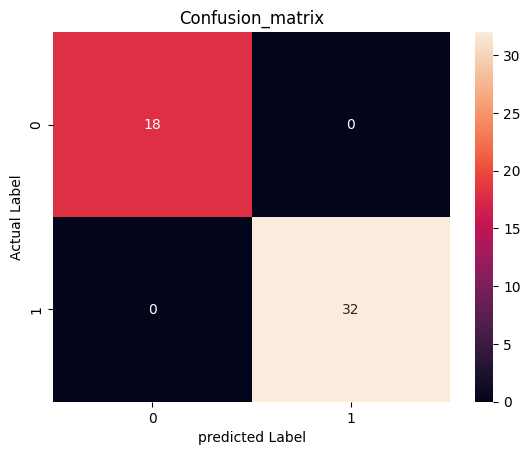

In [29]:
sns.heatmap(confusion_logist, annot =True)
plt.xlabel("predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion_matrix")
plt.show()

###  Accuracy of a Model

In [30]:
# Train Accuracy

train_acc_logist = np.mean(logisticlassifier.predict(x_train)== y_train)
train_acc_logist

0.995

In [31]:
# Test Accuracy

test_acc_logist = np.mean(logisticlassifier.predict(x_test)== y_test)
test_acc_logist

1.0

In [32]:
from sklearn.metrics import accuracy_score

logistic_acc = accuracy_score(y_test, y_pred)
logistic_acc

1.0

### Accuracy of overall model

In [33]:
logisticlassifier.fit(x, y)

logisticlassifier.coef_ # coefficients of features



array([[-0.5741981 , -0.75397787,  2.61063166,  2.41434068,  4.00955826,
        -0.51358089]])

In [34]:
y_pred = logisticlassifier.predict(x)

confusion_matrix = confusion_matrix(y, y_pred)
confusion_matrix


array([[106,   1],
       [  0, 143]])

In [35]:
acc = accuracy_score(y, y_pred)
acc

0.996

In [36]:
logisticlassifier.score(x_test, y_test)

1.0

In [37]:
logisticlassifier.score(x_train, y_train)

0.995

In [38]:
#performing croos val score

In [39]:
logistic_cross_val = cross_val_score(logisticlassifier, x,y, cv=10)

In [40]:
print("Cross-Validation Scores:", logistic_cross_val)

Cross-Validation Scores: [1.   1.   1.   1.   1.   1.   0.96 1.   1.   1.  ]


In [41]:
print(logistic_cross_val.mean())

0.9960000000000001


### Evaluating the Classifier model on New Data

In [42]:
prediction = logisticlassifier.predict([[0.5,0.5,1,1,0.5,0.5]])
print(prediction)

[1]


### From the accuracy we can say that the model is overfitted to avoid overfit problem we use Regularozation method
#### here we have L1, L2 regularization
##### It turns out they have different but equally useful properties. From a practical standpoint, L1 tends to shrink coefficients to zero whereas L2 tends to shrink coefficients evenly. L1 is therefore useful for feature selection, as we can drop any variables associated with coefficients that go to zero.
#### L1 = lasso regularization

In [43]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha = 50, max_iter = 100, tol =0.1)

lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [44]:
lasso_reg.score(x_test, y_test)

-0.03135850694444442

In [45]:
lasso_reg.score(x_train, y_train)

0.0

#### L2 = Ridge regularization

In [46]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 50, max_iter = 100, tol = 0.1)

ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [47]:
ridge_reg.score(x_test, y_test)

0.7850284233929685

In [48]:
ridge_reg.score(x_train, y_train)

0.757416453720328

# 2. KNN model

In [49]:
from sklearn.neighbors import KNeighborsClassifier as KNC
import warnings
warnings.filterwarnings('ignore')

### To choose k value

In [50]:
import math
math.sqrt(len(y_test))

7.0710678118654755

Here we are choosing the k value to be  7 (choosing odd value)

Define the model KNN and fit model

In [51]:
KNN_classifier = KNC(n_neighbors =7, p = 2, metric = 'euclidean')

In [52]:
KNN_classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

#### Predict the Test set results

In [53]:
y_pred = KNN_classifier.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

#### Evaluate model

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0]
 [ 1 31]]


In [55]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.9841269841269841


In [56]:
#perform cross validation

In [57]:
knn_cross_val = cross_val_score(KNN_classifier, x,y, cv=10)

In [58]:
print("Cross-Validation Scores:", knn_cross_val)

Cross-Validation Scores: [1.   1.   1.   1.   1.   1.   0.92 1.   1.   0.96]


In [59]:
print(knn_cross_val.mean())

0.9879999999999999


#### Accuracy of KNN model


In [60]:
# Train Accuracy

train_acc_KNN = np.mean(KNN_classifier.predict(x_train)== y_train)
train_acc_KNN

0.99

In [61]:
from sklearn.metrics import accuracy_score

KNN_acc = accuracy_score(y_test, y_pred)
KNN_acc

0.98

##### performing model for differnet k values

In [62]:
# creating empty list variable
from sklearn.metrics import accuracy_score
acc = []

# running KNN algorithm for 3 to 50 nearest neighbors (odd numbers) and
# sorthing the accuracy values

for i in range(3,50,2):
    neigh = KNC(n_neighbors = i)
    neigh.fit(x_train, y_train)
    train_acc = accuracy_score(neigh.predict(x_train), y_train)
    test_acc = accuracy_score(neigh.predict(x_test), y_test)
    acc.append([train_acc, test_acc])

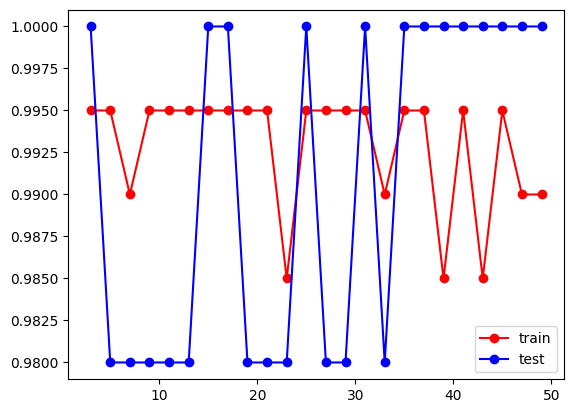

In [63]:
# train accuracy plot
plt.plot(np.arange(3,50,2),[i[0] for i in acc], "ro-")

# test accuracy plot
plt.plot(np.arange(3,50,2),[i[1] for i in acc], "bo-")

plt.legend(["train", "test"])

from the above plot we can choose our best k value

In [64]:
neigh = KNC(n_neighbors = 5,p = 2, metric = 'euclidean')
neigh.fit(x_train, y_train)

train_acc = accuracy_score(neigh.predict(x_train), y_train)
test_acc = accuracy_score(neigh.predict(x_test), y_test)

print(train_acc)
print(test_acc)

0.995
0.98


In [65]:
neigh = KNC(n_neighbors = 9,p = 2, metric = 'euclidean')
neigh.fit(x_train, y_train)

train_acc = accuracy_score(neigh.predict(x_train), y_train)
test_acc = accuracy_score(neigh.predict(x_test), y_test)

print(train_acc)
print(test_acc)

0.995
0.98


# 3. Naive Bayes Classifier

In [66]:
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB


#### Creating GaussianNB and MultinomialNB functions


In [67]:
GNB = GaussianNB()
MNB = MultinomialNB()

#### Building the model with GaussianNB


In [68]:
Naive_GNB = GNB.fit(x_train ,y_train)

y_pred = Naive_GNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

#### Evaluate Model

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0]
 [ 0 32]]


#### Accuracy of GNB

In [70]:
# Train Accuracy

train_acc_GNB = np.mean(Naive_GNB.predict(x_train)== y_train)
train_acc_GNB

0.975

In [71]:
#performing cross val

In [72]:
gnb_cross_val = cross_val_score(GNB, x, y, cv=5, scoring='accuracy')

In [73]:
print("Cross-Validation Scores:", gnb_cross_val)

Cross-Validation Scores: [0.98 0.98 0.96 0.96 0.98]


In [74]:
print(gnb_cross_val.mean())

0.9719999999999999


In [75]:
from sklearn.metrics import accuracy_score

GNB_acc = accuracy_score(y_test , y_pred)
GNB_acc

1.0

#### Building the model with MultinomialNB


In [76]:
Naive_MNB = MNB.fit(x_train ,y_train)

y_pred = Naive_MNB.predict(x_test)
y_pred

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1])

#### Evaluating Model


In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[18  0]
 [ 0 32]]


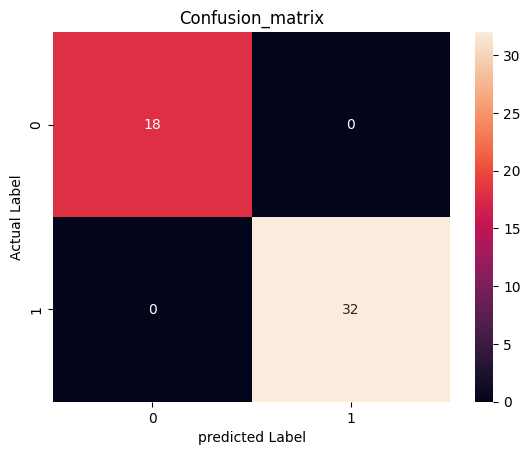

In [78]:
sns.heatmap(cm, annot =True)
plt.xlabel("predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion_matrix")
plt.show()

#### Accuracy of MNB

In [79]:
# Train Accuracy

train_acc_MNB = np.mean(Naive_MNB.predict(x_train)== y_train)
train_acc_MNB

0.975

In [80]:
from sklearn.metrics import accuracy_score

MNB_acc = accuracy_score(y_test , y_pred)
MNB_acc

1.0

In [81]:
#perform cross val

In [82]:
mnb_cross_val = cross_val_score(MNB, x,y, cv=10)

In [83]:
print(mnb_cross_val.mean())

0.9760000000000002


# 4. Support Vector Machine

In [84]:
from sklearn.svm import SVC


#### Kernel = Linear model

In [85]:
model_linear = SVC(kernel = 'linear')

model_linear.fit(x_train, y_train)

pred_test_linear = model_linear.predict(x_test)

print(confusion_matrix(pred_test_linear, y_test))

print(np.mean(pred_test_linear==y_test))

print(classification_report(y_test, y_pred))

[[18  0]
 [ 0 32]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        32

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [86]:
#performing cross val

In [87]:
svmlinear_cross_val = cross_val_score(model_linear, x,y, cv=10, scoring='accuracy')

In [88]:
print(svmlinear_cross_val.mean())

0.9960000000000001


#### Kernel = ploy model

In [89]:
model_poly = SVC(kernel = "poly", probability= True, random_state = 0)
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)


np.mean(pred_test_poly==y_test) # Accuracy

0.98

In [90]:
model_poly.fit(x_train,y_train)

SVC(kernel='poly', probability=True, random_state=0)

In [91]:
pred_train_poly = model_poly.predict(x_train)


np.mean(pred_train_poly==y_train) # Accuracy

1.0

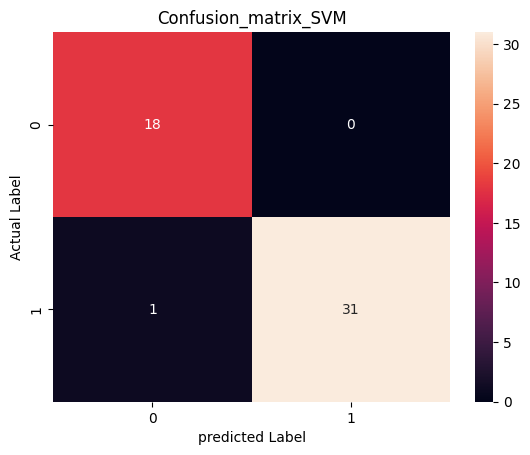

In [92]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, pred_test_poly)
sns.heatmap(confusion_mat, annot =True)
plt.xlabel("predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion_matrix_SVM")
plt.show()

#### Kernel = 'rbf' model --> Radial Basis Function

In [93]:
model_rbf = SVC(kernel = "rbf", C = 1000, gamma = "scale")
model_rbf.fit(x_train,y_train)
pred_test_rbf = model_rbf.predict(x_test)

print(np.mean(model_rbf.predict(x_train)==y_train))
print(np.mean(pred_test_rbf==y_test)) # Accuracy

1.0
1.0


In [94]:
#performing cross val scores

In [95]:
svmpoly_cross_val = cross_val_score(model_poly, x,y, cv=10, scoring='accuracy')

In [96]:
print(svmpoly_cross_val.mean())

0.9879999999999999


from the above kernels in SVM polynomial kernel giving good accuracy


# 5. Decision Tree Classifier

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

####  using gini criterion
#### Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified
#### It means an attribute with lower gini index should be preferred.

In [98]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)

clf_gini =clf_gini.fit(x_train, y_train)

train_pred = clf_gini.predict(x_train)
test_pred = clf_gini.predict(x_test)


In [99]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(test_pred,  y_test))
print(classification_report(test_pred, y_test))

[[18  4]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.88      1.00      0.93        28

    accuracy                           0.92        50
   macro avg       0.94      0.91      0.92        50
weighted avg       0.93      0.92      0.92        50



In [100]:
train_acc = accuracy_score(train_pred, y_train)
train_acc

0.985

In [101]:
test_acc = accuracy_score(test_pred, y_test)
test_acc

0.92

In [102]:
#performing cross val

In [103]:
gini_cross_val = cross_val_score(clf_gini, x,y, cv=10, scoring='accuracy')

In [104]:
print(gini_cross_val.mean())

0.976


#### Using Entropy criterion
#### Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.

In [105]:
# Decision tree with entropy

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)

clf_entropy =clf_entropy.fit(x_train, y_train)

train_pred = clf_entropy.predict(x_train)

test_pred = clf_entropy.predict(x_test)

In [106]:
print(confusion_matrix(test_pred,  y_test))

print(classification_report(test_pred, y_test))

[[18  4]
 [ 0 28]]
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.88      1.00      0.93        28

    accuracy                           0.92        50
   macro avg       0.94      0.91      0.92        50
weighted avg       0.93      0.92      0.92        50



In [107]:
train_acc = accuracy_score(train_pred, y_train)
train_acc

0.985

In [108]:
test_acc = accuracy_score(test_pred, y_test)
test_acc

0.92

In [109]:
entropy_cross_val = cross_val_score(clf_entropy, x,y, cv=10, scoring='accuracy')

In [110]:
print(entropy_cross_val.mean())

0.976


[Text(0.4, 0.8333333333333334, 'x[4] <= 0.25\nentropy = 0.991\nsamples = 200\nvalue = [89, 111]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.6, 0.5, 'x[3] <= 0.25\nentropy = 0.218\nsamples = 115\nvalue = [4, 111]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.985\nsamples = 7\nvalue = [4, 3]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 108\nvalue = [0, 108]')]

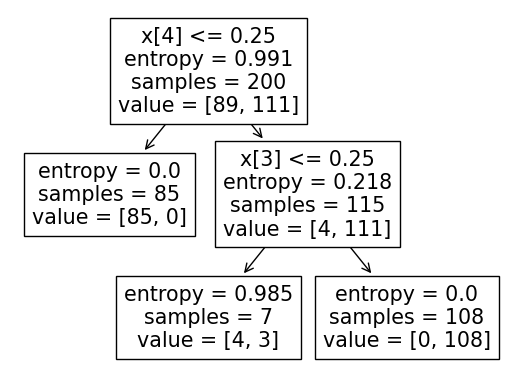

In [111]:
from sklearn import tree

tree.plot_tree(clf_entropy)

# 6. Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier


In [113]:
model_rf = RandomForestClassifier(n_estimators=10)

In [114]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [115]:
model_rf.score(x_test, y_test)

1.0

In [116]:
model_rf.score(x_train, y_train)

1.0

In [117]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=10,criterion="entropy")
# n_estimators -> Number of trees ( you can increase for better accuracy)
# n_jobs -> Parallelization of the computing and signifies the number of jobs
# running parallel for both fit and predict
# oob_score = True means model has done out of box sampling to make predictions

rf.fit(x_train, y_train) # Fitting RandomForestClassifier model from sklearn.ensemble
rf.estimators_ #
rf.classes_ # class labels (output)
rf.n_classes_ # Number of levels in class labels


rf.n_outputs_ # Number of outputs when fit performed

rf.oob_score_

rf_train_pred = rf.predict(x_train)
rf_test_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(rf_test_pred, y_test))
print(classification_report(rf_test_pred, y_test))

[[18  0]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        32

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [118]:
train_acc = accuracy_score(rf_train_pred, y_train)
print(train_acc)

test_acc = accuracy_score(rf_test_pred, y_test)
print(test_acc)

1.0
1.0


In [119]:
#Performing cross val

In [120]:
randomforest_cross_val = cross_val_score(model_rf, x,y, cv=10, scoring='accuracy')

In [121]:
print(randomforest_cross_val.mean())

0.9960000000000001


### Bagging classifier



In [122]:
from sklearn.ensemble import BaggingClassifier

In [123]:
bagging_clf = BaggingClassifier(n_estimators=10)

In [124]:
bagging_clf.fit(x_train, y_train)

BaggingClassifier()

In [125]:
bagging_clf.score(x_train, y_train)

1.0

In [126]:
bagging_clf.score(x_test, y_test)

0.98

In [127]:
#performing cross val

In [128]:
bagging_cross_val = cross_val_score(bagging_clf, x,y, cv=10, scoring='accuracy')

In [129]:
print(bagging_cross_val.mean())

0.992


#### Gradient Boosting Classifier

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
GBoost_clf = GradientBoostingClassifier(n_estimators =50, max_depth = 2)

In [132]:
GBoost_clf.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=50)

In [133]:
GBoost_clf.score(x_test, y_test)

0.98

In [134]:
GBoost_clf.score(x_train, y_train)

1.0

In [135]:
#performing cross val

In [136]:
gradient_cross_val = cross_val_score(GBoost_clf, x,y, cv=10, scoring='accuracy')

In [137]:
print(gradient_cross_val.mean())

1.0


###  AdaBoost Classifier

In [138]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators = 10, learning_rate = 1)
ada.fit(x_train, y_train)

print(ada.score(x_train, y_train))

print(ada.score(x_test, y_test))




1.0
0.98


In [139]:
AdaBoost_clf = AdaBoostClassifier()

In [140]:
AdaBoost_clf.fit(x_train, y_train)

AdaBoostClassifier()

In [141]:
AdaBoost_clf.score(x_train, y_train)

1.0

In [142]:
AdaBoost_clf.score(x_test, y_test)

0.98

In [143]:
#Performing cross val

In [144]:
Adaboost_cross_val = cross_val_score(AdaBoost_clf, x,y, cv=10, scoring='accuracy')

In [145]:
print(Adaboost_cross_val.mean())

0.992


# 7. Neural Network

In [146]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [147]:
mlp = MLPClassifier(hidden_layer_sizes=(5,3))

mlp.fit(x_train,y_train)


MLPClassifier(hidden_layer_sizes=(5, 3))

In [148]:
prediction_train= mlp.predict(x_train)
prediction_test = mlp.predict(x_test)

cm =confusion_matrix(y_test,prediction_test)
print(cm)
print(classification_report(y_test, prediction_test))

[[16  2]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.94      1.00      0.97        32

    accuracy                           0.96        50
   macro avg       0.97      0.94      0.96        50
weighted avg       0.96      0.96      0.96        50



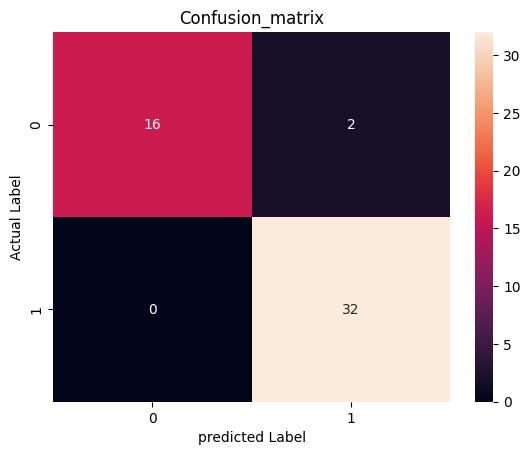

In [149]:
sns.heatmap(cm,annot =True)
plt.xlabel("predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion_matrix")
plt.show()

In [150]:
test_acc = np.mean(y_test==prediction_test)
test_acc

0.96

In [151]:
train_acc = np.mean(y_train==prediction_train)
train_acc

0.895

In [152]:
#performing cross val

In [153]:
nn_cross_val = cross_val_score(mlp, x,y, cv=10, scoring='accuracy')

In [154]:
print(nn_cross_val.mean())

0.884


# Prediction Probabilities


In [155]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = logisticlassifier.predict_proba(x_test)
knn_probs = neigh.predict_proba(x_test)
gnb_probs = Naive_GNB.predict_proba(x_test)
mnb_probs = Naive_MNB.predict_proba(x_test)
sv_probs = model_poly.predict_proba(x_test)
dt_probs = clf_entropy.predict_proba(x_test)
rf_probs = model_rf.predict_proba(x_test)
bagg_probs = bagging_clf.predict_proba(x_test)
boost_probs = AdaBoost_clf.predict_proba(x_test)
nn_probs = mlp.predict_proba(x_test)

# Probabilites for the Positive outcome is kept.

In [156]:
lr_probs = lr_probs[:,1]
knn_probs = knn_probs[:,1]
gnb_probs = gnb_probs[:,1]
mnb_probs = mnb_probs[:,1]
sv_probs = sv_probs[:,1]
dt_probs = dt_probs[:,1]
rf_probs = rf_probs[:,1]
bagg_probs = bagg_probs[:,1]
boost_probs = boost_probs[:,1]
nn_probs = nn_probs[:,1]

# Compute the AUROC Values

In [157]:
from sklearn.metrics import roc_curve, roc_auc_score

r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test,lr_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
gnb_auc = roc_auc_score(y_test,gnb_probs)
mnb_auc = roc_auc_score(y_test,mnb_probs)
sv_auc = roc_auc_score(y_test,sv_probs)
dt_auc = roc_auc_score(y_test,dt_probs)
rf_auc = roc_auc_score(y_test,rf_probs)
bagg_auc = roc_auc_score(y_test,bagg_probs)
boost_auc = roc_auc_score(y_test,boost_probs)
nn_auc = roc_auc_score(y_test,nn_probs)


# Display the AUROC Scores

In [158]:
print("Random Prediction: AUROC = %.3f" %(r_auc))
print("Logistic Regression: AUROC = %.3f" %(lr_auc))
print("KNearest Neighbors: AUROC = %.3f" %(knn_auc))
print("GaussianNB : AUROC = %.3f" %(gnb_auc))
print("MultinomialNB: AUROC = %.3f" %(mnb_auc))
print("Support Vector Machine: AUROC = %.3f" %(sv_auc))
print("Decision Tree: AUROC = %.3f" %(dt_auc))
print("Random Forest: AUROC = %.3f" %(rf_auc))
print("Baggining Classifier: AUROC = %.3f" %(bagg_auc))
print("AdaBoost Classifier: AUROC = %.3f" %(boost_auc))
print("Neural Network: AUROC = %.3f" %(nn_auc))

Random Prediction: AUROC = 0.500
Logistic Regression: AUROC = 1.000
KNearest Neighbors: AUROC = 1.000
GaussianNB : AUROC = 1.000
MultinomialNB: AUROC = 1.000
Support Vector Machine: AUROC = 1.000
Decision Tree: AUROC = 1.000
Random Forest: AUROC = 1.000
Baggining Classifier: AUROC = 1.000
AdaBoost Classifier: AUROC = 1.000
Neural Network: AUROC = 0.998


# Calculate the ROC Curve

In [159]:
r_fpr, r_tpr, thresholds = roc_curve (y_test, r_probs)
lr_fpr, lr_tpr, thresholds = roc_curve(y_test,lr_probs)
knn_fpr, knn_tprc, thresholds = roc_curve(y_test,knn_probs)
gnb_fpr, gnb_tpr, thresholds = roc_curve(y_test,gnb_probs)
mnb_fpr, mnb_tpr, thresholds = roc_curve(y_test,mnb_probs)
sv_fpr, sv_tpr, thresholds = roc_curve(y_test,sv_probs)
dt_fpr, dt_tpr, thresholds = roc_curve(y_test,dt_probs)
rf_fpr, rf_tpr, thresholds = roc_curve(y_test,rf_probs)
bagg_fpr, bagg_tpr, thresholds = roc_curve(y_test,bagg_probs)
boost_fpr, boost_tpr, thresholds = roc_curve(y_test,boost_probs)
nn_fpr, nn_tpr, thresholds = roc_curve(y_test,nn_probs)

# Plot the ROC Curve

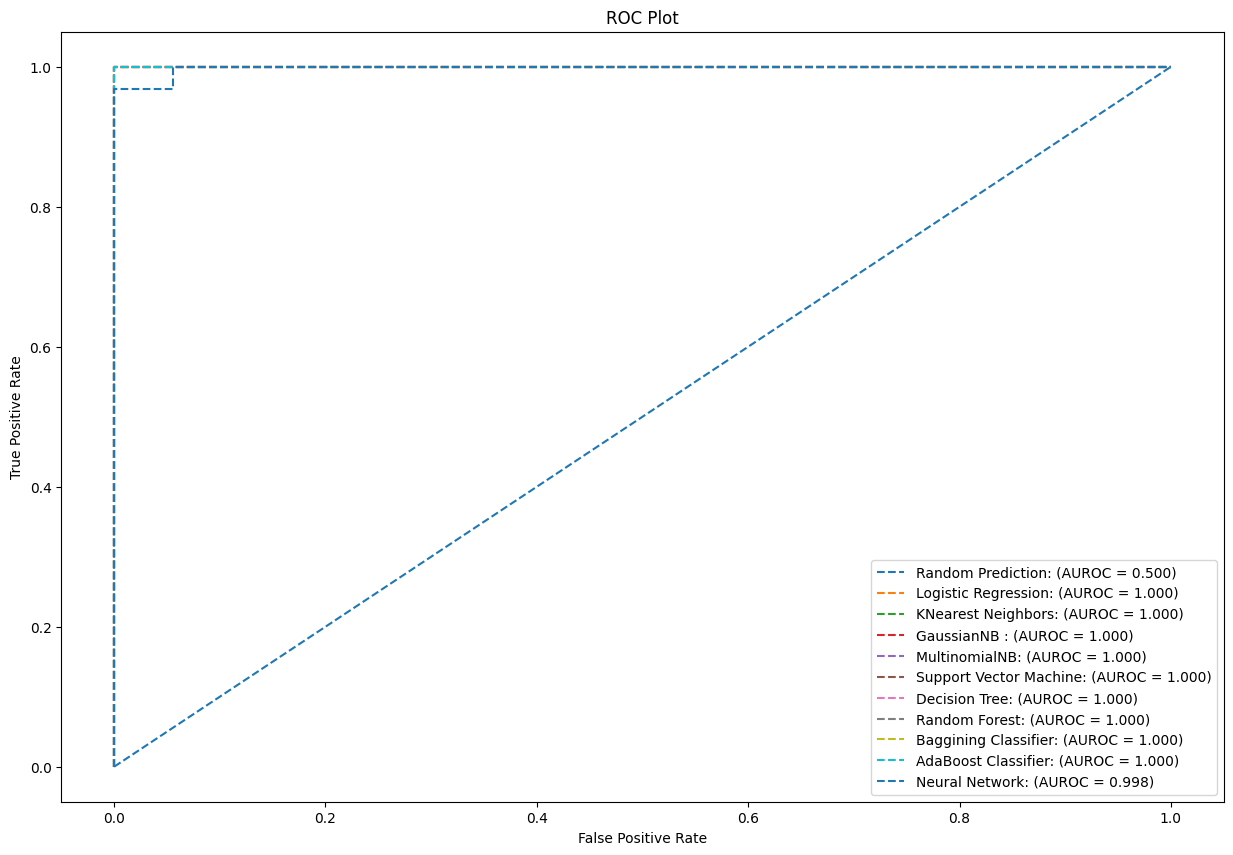

In [160]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
plt.plot(r_fpr, r_tpr , linestyle = '--', label = "Random Prediction: (AUROC = %.3f)" %r_auc)
plt.plot(lr_fpr, lr_tpr , linestyle = '--', label = "Logistic Regression: (AUROC = %.3f)" %lr_auc)
plt.plot(knn_fpr, knn_tprc , linestyle = '--', label = "KNearest Neighbors: (AUROC = %.3f)" %knn_auc)
plt.plot(gnb_fpr, gnb_tpr , linestyle = '--', label = "GaussianNB : (AUROC = %.3f)" %gnb_auc)
plt.plot(mnb_fpr, mnb_tpr , linestyle = '--', label = "MultinomialNB: (AUROC = %.3f)" %mnb_auc)
plt.plot(sv_fpr, sv_tpr , linestyle = '--', label = "Support Vector Machine: (AUROC = %.3f)" %sv_auc)
plt.plot(dt_fpr, dt_tpr , linestyle = '--', label = "Decision Tree: (AUROC = %.3f)" %dt_auc)
plt.plot(rf_fpr, rf_tpr , linestyle = '--', label = "Random Forest: (AUROC = %.3f)" %rf_auc)
plt.plot(bagg_fpr, bagg_tpr , linestyle = '--', label = "Baggining Classifier: (AUROC = %.3f)" %bagg_auc)
plt.plot(boost_fpr, boost_tpr , linestyle = '--', label = "AdaBoost Classifier: (AUROC = %.3f)" %boost_auc)
plt.plot(nn_fpr, nn_tpr , linestyle = '--', label = "Neural Network: (AUROC = %.3f)" %nn_auc)

#Title
plt.title('ROC Plot')

# Axis Labels
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Show Legend

plt.legend()
plt.show()

In [161]:
model = []
model.append(('logistic regression' , logistic_cross_val.mean()))
model.append(('KNN model' , knn_cross_val.mean()))
model.append(('Naive Bayes GaussianNB' , gnb_cross_val.mean()))
model.append(('Naive Bayes MultinomialNB' , mnb_cross_val.mean()))
model.append(('SVM Linear' , svmlinear_cross_val.mean()))
model.append(('SVM Poly',svmpoly_cross_val.mean()))
model.append(('Decision Tree Gini' , gini_cross_val.mean()))
model.append(('Decision Tree Entropy' , entropy_cross_val.mean()))
model.append(('Random Forest' , randomforest_cross_val.mean()))
model.append(('Bagging Classifier' , bagging_cross_val.mean()))
model.append(('Gradient Boost' , gradient_cross_val.mean()))
model.append(('AdaBoost',Adaboost_cross_val.mean()))
model.append(('Neural Network',nn_cross_val.mean()))

In [162]:
model = pd.DataFrame(model)
model.rename(columns={0:'models',1:'cross_val_score'},inplace=True)

In [163]:
model.sort_values('cross_val_score',ascending=False)

,models,cross_val_score
10,Gradient Boost,1.000
0,logistic regression,0.996
4,SVM Linear,0.996
8,Random Forest,0.996
9,Bagging Classifier,0.992
11,AdaBoost,0.992
1,KNN model,0.988
5,SVM Poly,0.988
3,Naive Bayes MultinomialNB,0.976
6,Decision Tree Gini,0.976
